-2.8


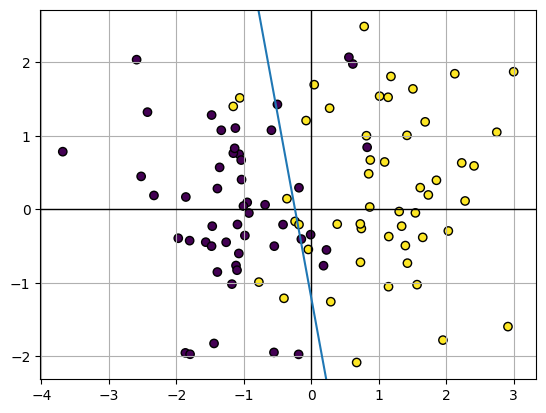

In [16]:
import torch
from torch import nn

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

def plotmodel(w1, w2, b):
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, edgecolors='k')

    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()
    x = np.linspace(-2, 4, 50)
    y = (-w1*x -b)/w2

    plt.axvline(0, -1, 1, color='k', linewidth=1)
    plt.axhline(0, -2, 4, color='k', linewidth=1)
    plt.plot(x, y)
    plt.grid(True)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

w1 = 5
w2 = 1
b = 1.2
plotmodel(w1, w2, b)
p = (-1, 1)

print(w1*p[0] + w2*p[1] + b)

In [17]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

perceptron.weight = nn.Parameter(torch.Tensor([[w1,w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.0837,  0.1550]])
tensor([-0.3659])
tensor([[5., 1.]])
tensor([1.2000])


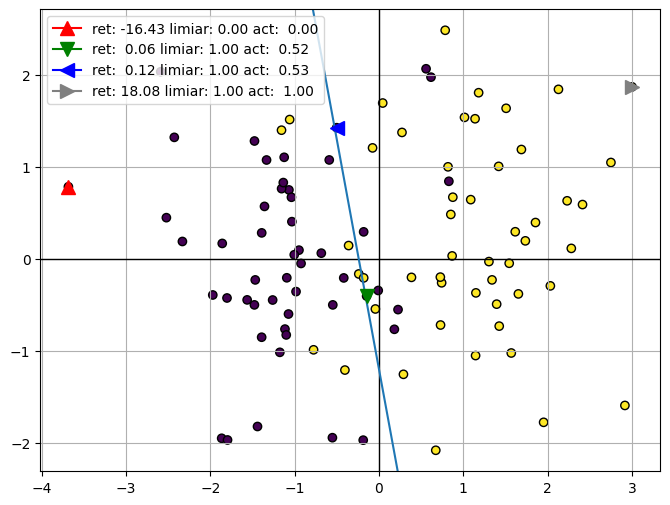

In [21]:
markers = ['^', 'v', '<', '>']
colors = ['r', 'g', 'b', 'gray']

activation = sigmoide
# activation = nn.ReLu
# activation = nn.Tanh()

plt.figure(figsize=(8,6))
plotmodel(w1,w2,b)
for k, idx in enumerate([17,21,43,66]):
    x = torch.Tensor(X[idx])
    
    ret = perceptron(x)
    act = activation(ret)
    
    act_limiar = 0 if ret.data < 0 else 1
    
    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
    
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
    
plt.legend()
plt.show()
